In [32]:
# import the pandas data science library
import pandas as pd
import numpy as np

# import the scipy spatial distance capability
from scipy.spatial.distance import cdist

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs

# import sklearn k-means and gaussian-mixture classifier library
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import matplotlibs 3D plotting capabilities
from mpl_toolkits.mplot3d import Axes3D

In [31]:
plt.style.use('seaborn')
%matplotlib inline

In [3]:
random_seed = 42

In [33]:
df = pd.read_excel ('/Users/thomasspahni/CFDS05 Data/File 2017.xlsx')
print (df)

     Current Ratio  Quick Ratio  Cash Ratio  Debt-to-Equity   \
0         0.104092     0.089644    0.191137         0.260008   
1         0.018237     0.015429    0.029735         0.029005   
2         0.048826     0.010814    0.014167         0.262473   
3         0.039834     0.038306    0.066330         0.263526   
4         0.039812     0.036751    0.053027         0.300424   
..             ...          ...         ...              ...   
417       0.059891     0.049297    0.042523         0.263844   
418       0.059087     0.043970    0.033927         0.263271   
419       0.051957     0.051957    0.090740         0.251418   
420       0.046530     0.025148    0.015399         0.261585   
421       0.121667     0.080272    0.128871         0.270206   

     Debt to Total Assets  STD / Total Assets  LTD / Total Assets  \
0                0.063322            0.036151            0.057296   
1                0.125985            0.070183            0.114319   
2                0.03266

In [34]:
data = pd.read_excel (r'/Users/thomasspahni/CFDS05 Data/File 2017.xlsx') 
df = pd.DataFrame(data)
print (df)

     Current Ratio  Quick Ratio  Cash Ratio  Debt-to-Equity   \
0         0.104092     0.089644    0.191137         0.260008   
1         0.018237     0.015429    0.029735         0.029005   
2         0.048826     0.010814    0.014167         0.262473   
3         0.039834     0.038306    0.066330         0.263526   
4         0.039812     0.036751    0.053027         0.300424   
..             ...          ...         ...              ...   
417       0.059891     0.049297    0.042523         0.263844   
418       0.059087     0.043970    0.033927         0.263271   
419       0.051957     0.051957    0.090740         0.251418   
420       0.046530     0.025148    0.015399         0.261585   
421       0.121667     0.080272    0.128871         0.270206   

     Debt to Total Assets  STD / Total Assets  LTD / Total Assets  \
0                0.063322            0.036151            0.057296   
1                0.125985            0.070183            0.114319   
2                0.03266

In [35]:
pd.DataFrame(data).head(5)

,Current Ratio,Quick Ratio,Cash Ratio,Debt-to-Equity,Debt to Total Assets,STD / Total Assets,LTD / Total Assets,Debt to Equity,STD to Equity,LTD to Equity,Current Assets to Fixed Assets,Proprietary Ratio,Fixed Asset Ratio,Goodwill to Assets,Equity Ratio,Gross Margin,EBITDA Margin,EBIT Margin,Net Profit Margin,External Financing Index Ratio,Operating Cash Flow,ROE,Capital Turnover Ratio,Asset Turnover Ratio,Net Working Capital Turnover Ratio,ROA,Operating Cash Flow Ratio,FCF Ratio,Asset Efficiency Ratio,Current Liability Coverage 2,Debt to EBITDA,Net Debt to EBITDA,FCF to Net Income,ROCE
0,0.104092,0.089644,0.191137,0.260008,0.063322,0.036151,0.057296,0.646018,0.493927,0.627318,0.399270,0.516092,0.600730,0.502192,0.920726,0.524572,0.450451,0.512153,0.411055,0.986199,0.152294,0.309393,0.272937,0.112552,0.572825,0.576189,0.347883,0.597723,0.399590,0.655308,0.241252,0.728861,0.743808,0.233249
1,0.018237,0.015429,0.029735,0.029005,0.125985,0.070183,0.114319,0.213659,0.060464,0.218489,0.136992,0.411295,0.863008,0.125797,0.779702,0.280854,0.410336,0.430890,0.378424,0.986180,0.093926,0.218437,0.095687,0.175250,0.566254,0.500491,0.262386,0.601490,0.368269,0.618849,0.275126,0.775564,0.743544,0.226819
2,0.048826,0.010814,0.014167,0.262473,0.032665,0.000000,0.033003,0.644555,0.488253,0.626385,0.517567,0.470789,0.482433,0.190262,0.879709,0.418535,0.351518,0.399668,0.380021,0.986473,0.073792,0.309315,0.278798,0.246490,0.575409,0.533767,0.214583,0.606823,0.330114,0.623389,0.231580,0.747097,0.743842,0.230804
3,0.039834,0.038306,0.066330,0.263526,0.081775,0.071393,0.069428,0.651956,0.506257,0.632251,0.275259,0.454709,0.724741,0.000000,0.868814,0.365875,0.512306,0.582481,0.428654,0.986128,0.142421,0.317058,0.275466,0.131215,0.578107,0.656662,0.428418,0.590783,0.531051,0.628540,0.232518,0.744953,0.743334,0.309157
4,0.039812,0.036751,0.053027,0.300424,0.140060,0.131453,0.117217,0.737873,0.652684,0.707039,0.240228,0.434808,0.759772,0.361949,0.800494,0.742863,0.577574,0.656689,0.421742,0.985758,0.136725,0.340862,0.287787,0.081740,0.576468,0.565758,0.500481,0.566367,0.470112,0.666507,0.265030,0.767991,0.744755,0.280331


In [36]:
num_columns = len(df.columns)
pd.set_option("display.max_columns", num_columns)
df.head(422)

,Current Ratio,Quick Ratio,Cash Ratio,Debt-to-Equity,Debt to Total Assets,STD / Total Assets,LTD / Total Assets,Debt to Equity,STD to Equity,LTD to Equity,Current Assets to Fixed Assets,Proprietary Ratio,Fixed Asset Ratio,Goodwill to Assets,Equity Ratio,Gross Margin,EBITDA Margin,EBIT Margin,Net Profit Margin,External Financing Index Ratio,Operating Cash Flow,ROE,Capital Turnover Ratio,Asset Turnover Ratio,Net Working Capital Turnover Ratio,ROA,Operating Cash Flow Ratio,FCF Ratio,Asset Efficiency Ratio,Current Liability Coverage 2,Debt to EBITDA,Net Debt to EBITDA,FCF to Net Income,ROCE
0,0.104092,0.089644,0.191137,0.260008,0.063322,0.036151,0.057296,0.646018,0.493927,0.627318,0.399270,0.516092,0.600730,0.502192,0.920726,0.524572,0.450451,0.512153,0.411055,0.986199,0.152294,0.309393,0.272937,0.112552,0.572825,0.576189,0.347883,0.597723,0.399590,0.655308,0.241252,0.728861,0.743808,0.233249
1,0.018237,0.015429,0.029735,0.029005,0.125985,0.070183,0.114319,0.213659,0.060464,0.218489,0.136992,0.411295,0.863008,0.125797,0.779702,0.280854,0.410336,0.430890,0.378424,0.986180,0.093926,0.218437,0.095687,0.175250,0.566254,0.500491,0.262386,0.601490,0.368269,0.618849,0.275126,0.775564,0.743544,0.226819
2,0.048826,0.010814,0.014167,0.262473,0.032665,0.000000,0.033003,0.644555,0.488253,0.626385,0.517567,0.470789,0.482433,0.190262,0.879709,0.418535,0.351518,0.399668,0.380021,0.986473,0.073792,0.309315,0.278798,0.246490,0.575409,0.533767,0.214583,0.606823,0.330114,0.623389,0.231580,0.747097,0.743842,0.230804
3,0.039834,0.038306,0.066330,0.263526,0.081775,0.071393,0.069428,0.651956,0.506257,0.632251,0.275259,0.454709,0.724741,0.000000,0.868814,0.365875,0.512306,0.582481,0.428654,0.986128,0.142421,0.317058,0.275466,0.131215,0.578107,0.656662,0.428418,0.590783,0.531051,0.628540,0.232518,0.744953,0.743334,0.309157
4,0.039812,0.036751,0.053027,0.300424,0.140060,0.131453,0.117217,0.737873,0.652684,0.707039,0.240228,0.434808,0.759772,0.361949,0.800494,0.742863,0.577574,0.656689,0.421742,0.985758,0.136725,0.340862,0.287787,0.081740,0.576468,0.565758,0.500481,0.566367,0.470112,0.666507,0.265030,0.767991,0.744755,0.280331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.059891,0.049297,0.042523,0.263844,0.091794,0.025652,0.088004,0.653800,0.494943,0.635403,0.263202,0.467667,0.736798,0.400029,0.865987,0.390480,0.378151,0.425384,0.370388,0.947332,0.050113,0.305686,0.275961,0.138902,0.574864,0.459745,0.154432,0.587120,0.192474,0.612139,0.297608,0.784936,0.742991,0.199246
418,0.059087,0.043970,0.033927,0.263271,0.085086,0.000000,0.085967,0.652094,0.488253,0.634323,0.241921,0.513263,0.758079,0.654926,0.871221,0.374682,0.400198,0.455016,0.385969,0.985677,0.140437,0.309041,0.275976,0.148793,0.575434,0.520581,0.295382,0.588480,0.388556,0.654999,0.265363,0.771206,0.744464,0.221411
419,0.051957,0.051957,0.090740,0.251418,0.489766,0.102418,0.475910,0.619934,0.480518,0.601290,0.380721,0.256412,0.619279,0.156475,0.497498,0.482074,0.528845,0.601286,0.433829,0.984157,0.149239,0.297052,0.266970,0.246877,0.576270,0.865202,0.325070,0.543395,0.577896,0.767078,0.299702,0.790954,0.744799,0.469105
420,0.046530,0.025148,0.015399,0.261585,0.103443,0.068305,0.091891,0.651973,0.501890,0.632736,0.138791,0.608103,0.861209,0.665645,0.891328,0.718305,0.523029,0.526250,0.435186,0.985472,0.124451,0.309851,0.272100,0.058737,0.575728,0.556846,0.351822,0.574765,0.310067,0.644702,0.279748,0.785509,0.743552,0.198877


In [37]:
df.shape[0]

422

In [38]:
df.shape[1]

34

In [39]:
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", df_pca.shape)

original shape:    (422, 34)
transformed shape: (422, 3)


In [40]:
no_clusters = 11

In [41]:
max_iterations = 10

In [42]:
kmeans = KMeans(n_clusters=no_clusters, max_iter=max_iterations)

In [43]:
kmeans.fit(df)

KMeans(max_iter=10, n_clusters=11)

In [44]:
labels = kmeans.labels_
print(labels)

[ 5  1  0  1  4  8  2  5  0  4  3  8  0  5  6  6  1  5  5 10  4  1 10  3
  0  8  3  4  6  6  0  2  3 10  0  7  1 10 10  6  6  3  7  3 10  7  0  0
  5  8  5  4 10  4  5  4  4 10  5 10  1  3 10  6  3  8  1 10  3  6  1  4
 10  1  4  1  3  8  6  0 10  6  2  0  0  6  8  1  7  3  6  8  3  3  0  5
  4  6  3  3  0  4 10  1  7  6  1 10  0 10  3  3  3  5  6 10  3 10  9  7
 10  1  6 10  6 10  4  4  5  3  6  3  6  4 10 10  7  5  7  6  7  3  6  4
  6  0  3  7  1  0  2 10  1  1  4  3  3  5 10  3  1  4  7 10  4  3 10 10
  4  3  1  1  4 10  3  0  4  0  1  4 10  6  7  0  6 10 10  3  3 10 10  0
  0 10 10  1  0  5  4  0  3  5  4  5  3  6  4  1 10  2  3 10  3  4  5 10
  5  0 10 10  3  5  5  3  5  3  7  4  0  6  1  5  8  0  6  0 10 10  3 10
  4 10  6  0  0  1  0 10  4  6 10  0  1  5  8  3  3  3  1 10  3  2 10  5
  4  1  1  1  5  6  3  4  0  0  0  4  5  6  6  3  6  1  1  6  0  3 10 10
  4  1  6  4 10  2  0 10  5  7  6  1 10  4  0  6  4  4  6  5  3  3 10  0
  1  3  7  0 10  6 10  6 10  7  8  5 10  6  4  4  5

In [45]:
means = kmeans.cluster_centers_ # obtain the assigned cluster means 
print(means)                    # print the cluster center coordinates

[[0.05844227 0.04050655 0.0527386  0.28127638 0.08202997 0.0347767
  0.0764525  0.66701054 0.51225408 0.64745976 0.45267638 0.4486701
  0.54732362 0.14264553 0.84818703 0.36322028 0.42590248 0.47812083
  0.39394569 0.98573445 0.14282806 0.33622479 0.30162709 0.31886791
  0.56397956 0.65133862 0.29044794 0.59010932 0.55078359 0.65497398
  0.22920753 0.74300554 0.74379899 0.36561019]
 [0.04661725 0.03645549 0.05199634 0.25936047 0.0984824  0.04907084
  0.09043368 0.64715736 0.49706547 0.62818226 0.1734677  0.46115794
  0.8265323  0.1028229  0.86631861 0.29128507 0.44835938 0.47517129
  0.39373191 0.98606682 0.15109627 0.30593074 0.27174336 0.12718626
  0.57755214 0.53372822 0.32141304 0.59829839 0.37050779 0.63800398
  0.29614069 0.78480716 0.7431745  0.22360103]
 [0.32548072 0.3106914  0.48890262 0.25935924 0.02038773 0.0043718
  0.01979092 0.64247507 0.48903095 0.62411233 0.57592643 0.51064056
  0.42407357 0.14001902 0.95806111 0.69235907 0.59758359 0.6676939
  0.45953787 0.98634857 0.

In [18]:
pd.DataFrame(labels).to_csv("2017_11_PCA.csv")

TypeError: '(slice(None, None, None), 0)' is an invalid key

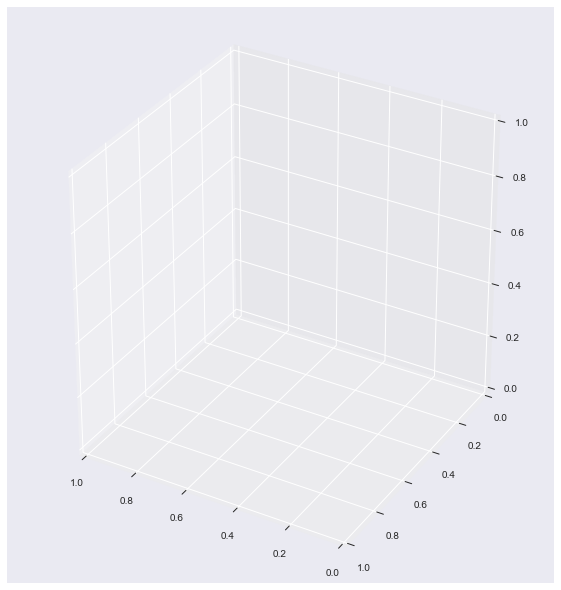

In [47]:
# init the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# init 3D plotting
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)

# add grid
ax.grid(linestyle='dotted')

# plot petal length (3rd feature in the dataset) vs. petal width (4th feature in the dataset)
ax.scatter(df[:,0], df[:,1], df[:,2], s=40)

# add axis legends


# add plot title
plt.title('Ratio Clustering', fontsize=14)

# show the 3-dimensional plot
plt.show();